In [28]:
import sys
!{sys.executable} -m pip install opencv-python==3.3.0.10 matplotlib

In [29]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print("OpenCV Version : %s " % cv2.__version__)

OpenCV Version : 3.3.0 


In [30]:
img_path = 'data/lYKS5z.png'

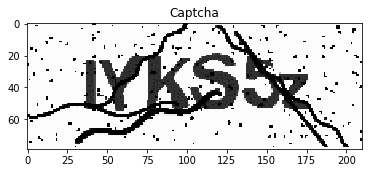

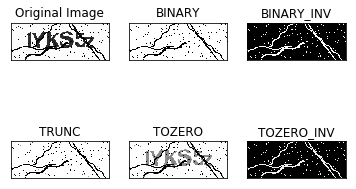

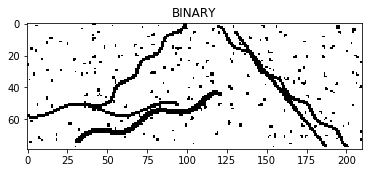

In [31]:
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

plt.imshow(img, 'gray')
plt.title('Captcha')
plt.show()

thresh_from = 127
thresh_to = 255
ret,thresh1 = cv2.threshold(img,thresh_from,thresh_to,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,thresh_from,thresh_to,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,thresh_from,thresh_to,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,thresh_from,thresh_to,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,thresh_from,thresh_to,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

plt.imshow(thresh1, 'gray')
plt.title('BINARY')
plt.show()

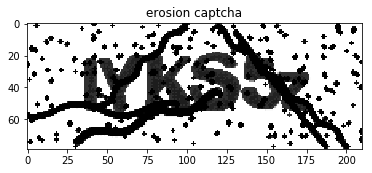

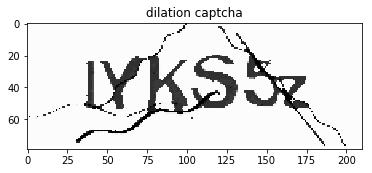

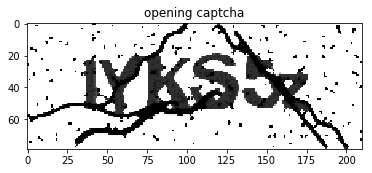

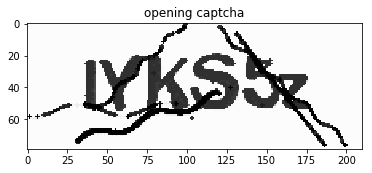

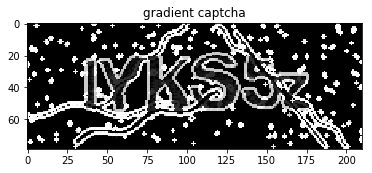

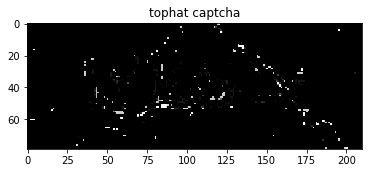

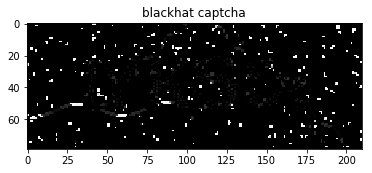

In [32]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
erosion = cv2.erode(img,kernel,iterations = 1)
dilation = cv2.dilate(img,kernel,iterations = 1)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)

plt.imshow(erosion, 'gray')
plt.title('erosion captcha')
plt.show()

plt.imshow(dilation, 'gray')
plt.title('dilation captcha')
plt.show()

plt.imshow(opening, 'gray')
plt.title('opening captcha')
plt.show()

plt.imshow(closing, 'gray')
plt.title('opening captcha')
plt.show()

plt.imshow(gradient, 'gray')
plt.title('gradient captcha')
plt.show()

plt.imshow(tophat, 'gray')
plt.title('tophat captcha')
plt.show()

plt.imshow(blackhat, 'gray')
plt.title('blackhat captcha')
plt.show()

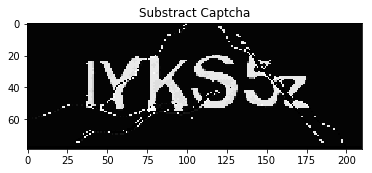

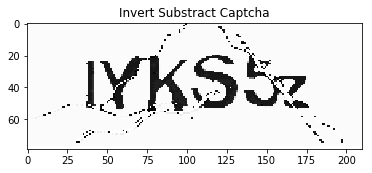

In [33]:
# DO IT !

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
dilation = cv2.dilate(img,kernel,iterations = 1)
ret, thresh1 = cv2.threshold(dilation, 127, 255,cv2.THRESH_BINARY)
substracted_img = cv2.subtract(thresh1, dilation)
plt.imshow(substracted_img, 'gray')
plt.title('Substract Captcha')
plt.show()

invert_substracted_img = cv2.bitwise_not(substracted_img)
plt.imshow(invert_substracted_img, 'gray')
plt.title('Invert Substract Captcha')
plt.show()

[((28, 18), (54, 60)), ((54, 18), (80, 60)), ((80, 18), (106, 60)), ((106, 18), (132, 60)), ((132, 18), (158, 60)), ((158, 18), (184, 60))]


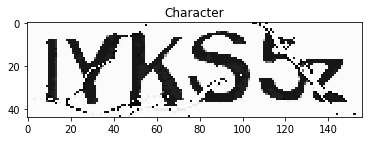

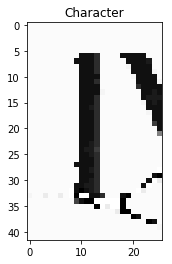

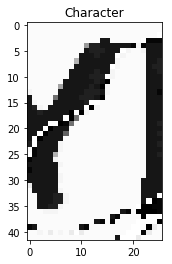

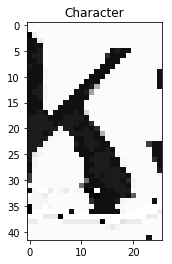

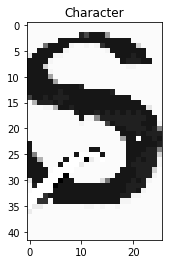

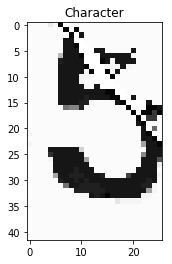

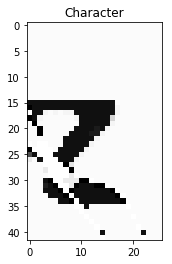

In [35]:
clean_img = invert_substracted_img.copy()
fX = 28
fY = 18
tX = 184
tY = 60
N = 6
dX = int((tX - fX) / N)
ranges = []
slice_imgs = []

for i in range(N):
    ranges.append(((fX + dX * i, fY), (fX + dX * (i + 1), tY)))

print(ranges)

test = clean_img[16:60, 28:184]
plt.imshow(test, 'gray')
plt.title('Character')
plt.show()

for i in range(N):
    r = ranges[i]
    slice_img = clean_img[r[0][1]:r[1][1], r[0][0]:r[1][0]]
    plt.imshow(slice_img, 'gray')
    plt.title('Character')
    plt.show()